In [1]:
!pip install opencv-python opencv-contrib-python

  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)


In [2]:
import cv2

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

cv2.imshow('model', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- imread(파일명, 이미지형식) : 이미지 파일을 읽기 위한 객체를 리턴
- 칼라 (cv2.IMREAD_COLOR), 흑백(cv2.IMREAD_GRAYSCALE) 등 
- imshow(제목, 이미지객체) : 이미지 출력
- cv2.waitKey(0) : 키보드 입력을 기다리는 시간 설정( 0 : 계속 기다림 )
- destroyAllWindows() : 생성된 윈도우를 모두 닫는다.

#### 이미지 리사이즈

In [3]:
import cv2

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

dst = cv2.resize(img, dsize = (500,300), interpolation = cv2.INTER_LINEAR)
dst2 = cv2.resize(img, dsize = (0,0), fx = 0.4, fy= 0.7, interpolation = cv2.INTER_LINEAR)

cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.resize(이미지경로, dsize(절대크기), fx,fy(상대크기), interpolation(보간법))
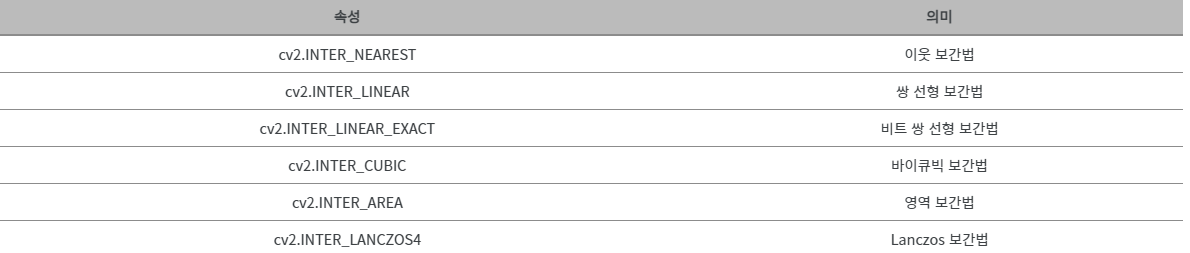

- 이미지를 확대하는 경우, 바이큐빅 보간법, 쌍 선형 보간법을 주로 사용
- 이미지를 축소하는 경우, 영역 보간법을 주로 사용

#### matplotlib을 이용한 칼라이미지 로딩 - 색상공간 변경

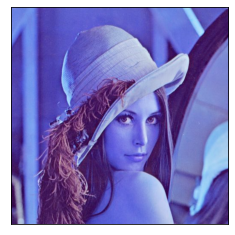

In [4]:
import cv2
import matplotlib.pyplot as plt

# cv2로 읽어온 이미지색상은 BGR 색상이다.
img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

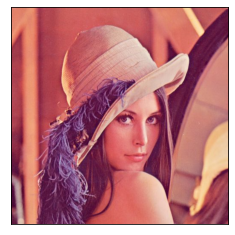

In [5]:
import cv2
import matplotlib.pyplot as plt

# cv2로 읽어온 이미지색상은 BGR 색상이다.
img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

# 색상공간을 변환 (BGR - RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

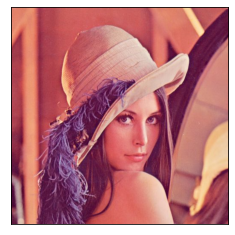

In [6]:
import cv2
import matplotlib.pyplot as plt

# cv2로 읽어온 이미지색상은 BGR 색상이다.
img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.xticks([])
plt.yticks([])
plt.imshow(img2)

#### 흑백(Gray) 이미지 로딩

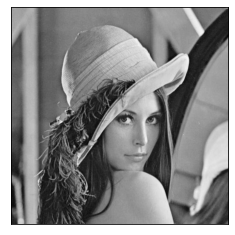

In [7]:
import cv2
import matplotlib.pyplot as plt

# cv2로 읽어온 이미지색상은 BGR 색상이다.
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)

plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap = 'gray')

#### 이진 (Binary) 이미지 만들기
- 픽셀값 0,255로 구성

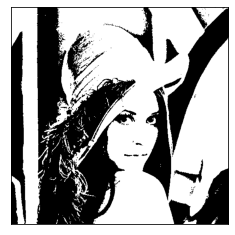

In [8]:
import cv2
import matplotlib.pyplot as plt

# cv2로 읽어온 이미지색상은 BGR 색상이다.
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
ret, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])
plt.imshow(thr1, cmap = 'gray')

- cv2.threshold(img, threshold_value, value, flag)
    - img : Grayscale 이미지
    - threshold_value : 픽셀 문턱값 ( 0과 255로 나누기 위한 기준값 )
    - value : 문턱값보다 클 때 적용되는 값
    - flag : 문턱값 적용 방법
        - cv2.THRESH_BINARY : 픽셀값이 문턱값보다 크면 value 적용, 아니면 0을 할당
        
        - cv2.THRESH_BINARY_INV : 픽셀값이 문턱값보다 크면 0 , 아니면 value 할당
        - cv2.THRESH_TRUNC : 픽셀값이 문턱값보다 크면 문턱값, 아니면 픽셀값 할당
        - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당
        - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0 , 아니면 픽셀값 할당

#### 이미지 픽셀 값 출력

In [9]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)
img[200, 100]

array([ 75,  61, 173], dtype=uint8)

#### 픽셀값 변경

In [10]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

for i in range(0,300):
    img[200,i] = [255,255,255]

cv2.imshow('model', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### RGB 채널 값으로 변경

In [11]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

for i in range(0,300):
    img.itemset((200, i, 2), 255)

cv2.imshow('model', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- itemset((y축 위치, x축 위치, 채널), 색상레벨)
- 채널 ( Blue : 0, Green : 1, Red : 2 )

### 이미지의 속성 출력

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

print(img.shape)
print(img.size)
print(img.dtype)

(512, 512, 3)
786432
uint8


### ROL (Region of Image) 설정

In [13]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

subimg = img[200:370, 200:350]

cv2.imshow('cutting', subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 도형 그리기

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)
img = cv2.rectangle(img, (200, 200), (350, 370), (0, 0, 255), 10)

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, "ROI Region", (200, 180), font, 1, (255, 0, 0), 4)

cv2.imshow("rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.rectangle(img, 좌상단점좌표, 우하단점좌표, 색상, 선의두께)
- cv2.putText(img, 출력내용, 출력좌표, 폰트(글씨체), 크기, 색상, 굵기)
- cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께) : 직선 그리기 함수
- cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께) : 원 그리기 함수
- cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께) : 사각형 그리기 함수
- cv2.ellipse(배경이미지, 중심좌표, 장축/단축길이, 호의시작각, 호의 종료각, 색상, 선두께) : 타원 그리기 함수

### 한글 출력하기

In [15]:
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)

# 폰트와, 폰트 크기 설정
font = ImageFont.truetype("fonts/gulim.ttc", 30)

# 이미지를 PIL 이미지로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)

# fill = (blue, green, red, alpha)
draw.text((200,20), "한글출력", font = font, fill = (255,0,0,0))

img = np.array(img_pil)

cv2.imshow("lena", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 합성하기

In [35]:
import cv2
import numpy as np

img = cv2.imread('./images/lenna.png', cv2.IMREAD_COLOR)
mask = cv2.imread('./images/logo.png', cv2.IMREAD_COLOR)

# mask 이미지를 붙일 위치 이미지 잘라내기 (ROI)
print(mask.shape)

rows, cols, channels = mask.shape
roi = img[:rows, :cols]

cv2.imshow("roi", roi)
cv2.imshow("mask",mask)

# mask 이미지 만들기 (이진 이미지)
mask2 = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
ret, mask_b = cv2.threshold(mask2, 200, 255, cv2.THRESH_BINARY) # 문턱 200을 넘기면 255로 변경 아니면 0
cv2.imshow("mask2", mask2)
cv2.imshow("mask_b", mask_b)

# 마스크 이미지 반전 (흑백 전환)
mask_b_inv = cv2.bitwise_not(mask_b)
cv2.imshow("mask_b_inv", mask_b_inv)

img_bg = cv2.bitwise_and(roi, roi, mask = mask_b)
cv2.imshow("img_bg", img_bg)

img_fg = cv2.bitwise_and(mask, mask, mask = mask_b_inv)
cv2.imshow("img_fg", img_fg)

# ROI 이미지에 마스크 이미지 합성하기
final_img = cv2.add(img_bg, img_fg)
cv2.imshow('final_img', final_img)

# 합성한 이미지 원본이미지에 붙이기
img[:rows, :cols] = final_img

cv2.imshow("lena", img)
# cv2.imshow("mask", mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

(142, 128, 3)
